# Practical 3: Establishing and testing the hypothesis

This week is focussed on defining research hypotheses, and using
statistical tests to evaluate them. In particular we will use the
Student’s T-test, and the KS distribution test.

> **Note**
>
> This practical follows on from practical 2, so if you haven’t done
> that yet I suggest going back and working through that first!

## Loading the data

We are going to look at schools perfomance data in England once again.

The data is sourced from gov.uk
[here](https://www.compare-school-performance.service.gov.uk/download-data) -
HOWEVER I have also saved a copy of the relevant dataset to the Github
repo (in case the dataset is removed from the website) which you can
load directly in the code below. In this notebook we’re using the
performance table for academic year 2022/23:
‘Performancetables_130242/2022-2023’.

If you do want to download the data directly from the gov.uk website
then you need to choose the academic year ‘2022 to 2023’, then ‘All of
England’, then ‘Key stage 4 results (final)’. Then you’ll want to
download the ‘Data in CSV format’ and also ‘Explanation of terminology
used in the data files’.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np 

# Read CSV file, handling common missing value entries
na_vals = ["", "NA", "SUPP", "NP", "NE", "SP", "SN", "SUPPMAT"]
df_ks4 = pd.read_csv('https://raw.githubusercontent.com/huanfachen/QM/refs/heads/main/sessions/L2_data/england_ks4final.csv',
    na_values = na_vals
)

/tmp/ipykernel_23449/2179567837.py:8: DtypeWarning:

Columns (75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,144,145,146,147,148,149,150,151,152,177,178,179,180,181,182,183,186,187,188,189,190,191,192,194,195,196,198,199,200,202,203,204,206,207,208,210,211,212,214,215,216,218,219,220,222,223,224,230,233,234,235,236,237,238,239,242,243,244,245,246,247,248,251,252,253,254,255,256,257,266,267,268,269,270,271,272,281,282,283,284,285,286,287,296,297,298,299,300,301,302,311,312,313,314,315,316,317,335,336,337,340,341,342,345,346,347,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410) have mixed types. Specify dtype option on import or set low_memory=False.


Following the same steps as last week we’re going to do some initial
data pre-processing:

In [2]:
info_cols = ['RECTYPE', 'LEA', 'SCHNAME', 'TOTPUPS', 'TOWN']
ebaccs_cols = ['EBACCAPS', 'EBACCAPS_GIRLS', 'EBACCAPS_BOYS']

df = df_ks4[info_cols + ebaccs_cols]

# make a copy of the dataframe to avoid SettingWithCopyWarning
df = df.copy()

df.loc[:, ebaccs_cols] = df.loc[:, ebaccs_cols].apply(pd.to_numeric, errors='coerce')
df['TOTPUPS'] = pd.to_numeric(df['TOTPUPS'], errors='coerce').fillna(0).astype('int64')

df = df[df['RECTYPE'].isin([1, 2])]

df.head()

Looking at the metadata (which you can see in ‘L2_data/ks4_meta.xlsx’)
we can see the full meaning of each column header:

-   ‘RECTYPE’ = Record type (1=mainstream school; 2=special school;
    4=local authority; 5=National (all schools); 7=National (maintained
    schools))
-   ‘LEA’ = Local authority
-   ‘SCHNAME’ = School name
-   ‘TOTPUPS’ = Number of pupils on roll (all ages)
-   ‘TOWN’ = School town
-   ‘EBACCAPS’ = Average EBacc APS score per pupil
-   ‘EBACCAPS_GIRLS’ = Average EBacc APS score per girl
-   ‘EBACCAPS_BOYS’ = Average EBacc APS score per boy

## Research question

The department for education is worried about regional inequality in
school grades. With this in mind they’ve come up with a research
question they’d like to address.

**Research question:** Is average pupil attainment on the EBacc
significantly different in London compared to the rest of England?

To do this we’re going to use the mean comparison test to compare the
schools in London to those outside of London.

## Preparing the data

### Splitting the groups

For simplicity let’s create two dataframes for the two different areas.

In [3]:
df_London = df[df['TOWN'] == 'London']
df_London = df_London[df_London['EBACCAPS'].notna()]

df_notLondon = df[df['TOWN'] != 'London']
df_notLondon = df_notLondon[df_notLondon['EBACCAPS'].notna()]

And look at the summary statistics for each group.

In [4]:
df_London['EBACCAPS'].describe()

count    385.000000
mean       3.788260
std        1.851894
min        0.000000
25%        3.020000
50%        4.290000
75%        4.970000
max        8.700000
Name: EBACCAPS, dtype: float64

In [5]:
df_notLondon['EBACCAPS'].describe()

count    4246.000000
mean        3.395921
std         1.659090
min         0.000000
25%         2.820000
50%         3.670000
75%         4.380000
max         8.560000
Name: EBACCAPS, dtype: float64

From looking at the summary statistics the two groups are different
sizes. The two groups also have different means - but we want to test if
these means are statistically-significantly different.

## The hypothesis test

We’re now going to work through the steps of the hypothesis test
according to the five steps discussed in the lecture:

1.  Define the null and alternative hypothesis
2.  Set the significance level
3.  Identify the evidence
4.  Calculate the p-value
5.  Compare p-value with hypothesis level

### Step 1

What is the null and alternative hypothesis?

#### Question

In [ ]:
H_0 = '??'
H_1 = '??'

print(f'The null hypothesis is {H_0}')
print(f'The alternative hypothesis is {H_1}')

### Step 2

Set the significance level.

In [7]:
# Set the level of statistical significance 

alpha = 0.05

### Step 3

Identify the evidence.

We already have the evidence - it’s our datasets `df_London['EBACCAPS']`
and `df_notLondon['EBACCAPS']`.

### Step 4

Calculate the p-value.

The statistical test we’re using here is Student’s T-test for two
samples. We can use a built in function from `scipy.stats` called
`ttest_ind` to do the statistical test for us. You can read more about
this function
[here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

Strictly, Student’s T-test for two-samples assumes both samples have
equal standard deviations. However, practically the test is robust as
long as the standard deviations are similar - a heuristic being that as
long as neither standard deviation is double the other, we’re ok to use
the test.

In [8]:
London_std = df_London['EBACCAPS'].std()
notLondon_std = df_notLondon['EBACCAPS'].std()

# Calculate the ratio of standard deviations 
std_ratio = London_std/notLondon_std

print("std ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

std ratio = 1.1162102116458004
Can assume equal population standard deviations.

There are two outputs from the function `scipy.stats.ttest_ind`: the
**test statistic** and the **p value**.

In [9]:
test_stat, p_value = sps.ttest_ind(df_London['EBACCAPS'], df_notLondon['EBACCAPS'], equal_var = equal_stds)

print("test statistic = ", test_stat)
print("p-value =", p_value)

test statistic =  4.398340904538903
p-value = 1.1153058452679495e-05

### Step 5

Compare p-value with hypothesis level.

For the final step we compare the p-value to the significance value in
order to reach a decision.

#### Question

In [ ]:
if p_value ?? ?? :
    print(f"Reject the null hypothesis ({H_0}). Accept the alternative hypothesis ({H_1}).")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value ?? ?? :
    print(f"No significant evidence to reject the null hypothesis ({H_0}).")
    print("Assume samples are drawn from populations with the same mean.")

Hence we can conclude that the evidence supports there is a
statistically significant difference between the mean student attainment
on the EBacc in London, versus outside of London.

## A more complicated research question

Now I’d like to know, are the EBacc scores for boys and girls in England
distributed similarly?

In the dataset we have the average EBacc score for each school split by
gender. To address whether these two samples come from the same
distribution we’re going to use the Kolmogorov-Smirnov two sample test.

## Preparing the data

### Summary statistics

As before, let’s start by looking at the summary statistics.

#### Question

In [ ]:
df[[??]].??

### Plotting the data

Let’s also visually inspect the data by plotting a histogram.

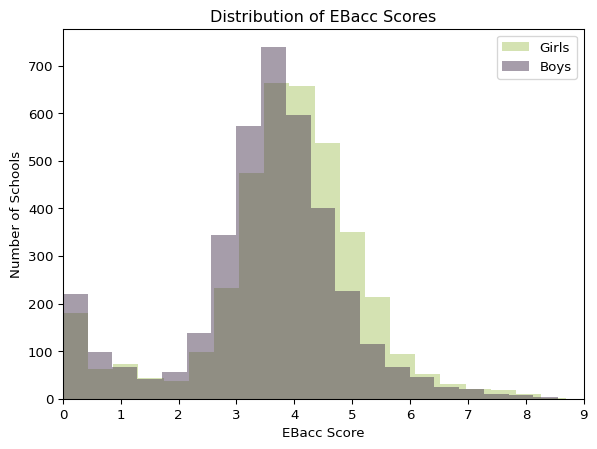

In [12]:
plt.hist(df['EBACCAPS_GIRLS'], bins=20, color='#abc766', alpha=0.5, label='Girls')
plt.hist(df['EBACCAPS_BOYS'], bins=20, color='#4e3c56', alpha=0.5, label='Boys')
plt.xlim(0,9) # the EBacc has a maximum score of 9
plt.xlabel('EBacc Score')
plt.ylabel('Number of Schools')
plt.title('Distribution of EBacc Scores')
plt.legend()

plt.show()

From visually looking at the plot we can see that the two distributions
look quite similar - but we want to formally test that. As before, we’re
going to follow the five steps of hypothesis testing.

### Step 1

What is the null and alternative hypothesis?

#### Question

In [ ]:
H_0 = '??'
H_1 = '??'

print(f'The null hypothesis is {H_0}')
print(f'The alternative hypothesis is {H_1}')

### Step 2

Set the significance level.

#### Question

In [ ]:
# Set the level of statistical significance 

alpha = ??

### Step 3

Identify the evidence.

We already have the evidence - it’s our datasets `df['EBACCAPS_GIRLS']`
and `df['EBACCAPS_BOYS']`.

### Step 4

Calculate the p-value.

The statistical test we’re going to use here is the Kolmogorov Smirnov
test. We can use a built in function from `scipy.stats` called
`ks_2samp` to do step 4 for us. You can read more about this function
[here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html).

There are two outputs from the function `scipy.stats.ks_2samp`: the
**test statistic** and the **p value**.

#### Question

In [ ]:

# first define dataset so as to ignore 'na' values
df_girls = df[df['EBACCAPS_GIRLS'].notna()]['EBACCAPS_GIRLS']
df_boys = df[df['EBACCAPS_BOYS'].notna()]['EBACCAPS_BOYS']

ks_stat, ks_p_value = sps.ks_2samp(??, ??) 

print("KS test statistic = ", ks_stat)
print("KS p-value =", ks_p_value)

### Step 5

Compare p-value with hypothesis level.

For the final step we compare the p-value to the significance value in
order to reach a decision.

#### Question

In [ ]:
if ??
    print(??)
else ?? 
    print(??)

## Extension

If you’ve finished working through the examples in the tutorial then
have a go at coming up with your own research question and hypothesis.

A good place to start would be by looking at the data in `df_ks4` -
theres a lot of numerical information here - are there two variables you
could compare?

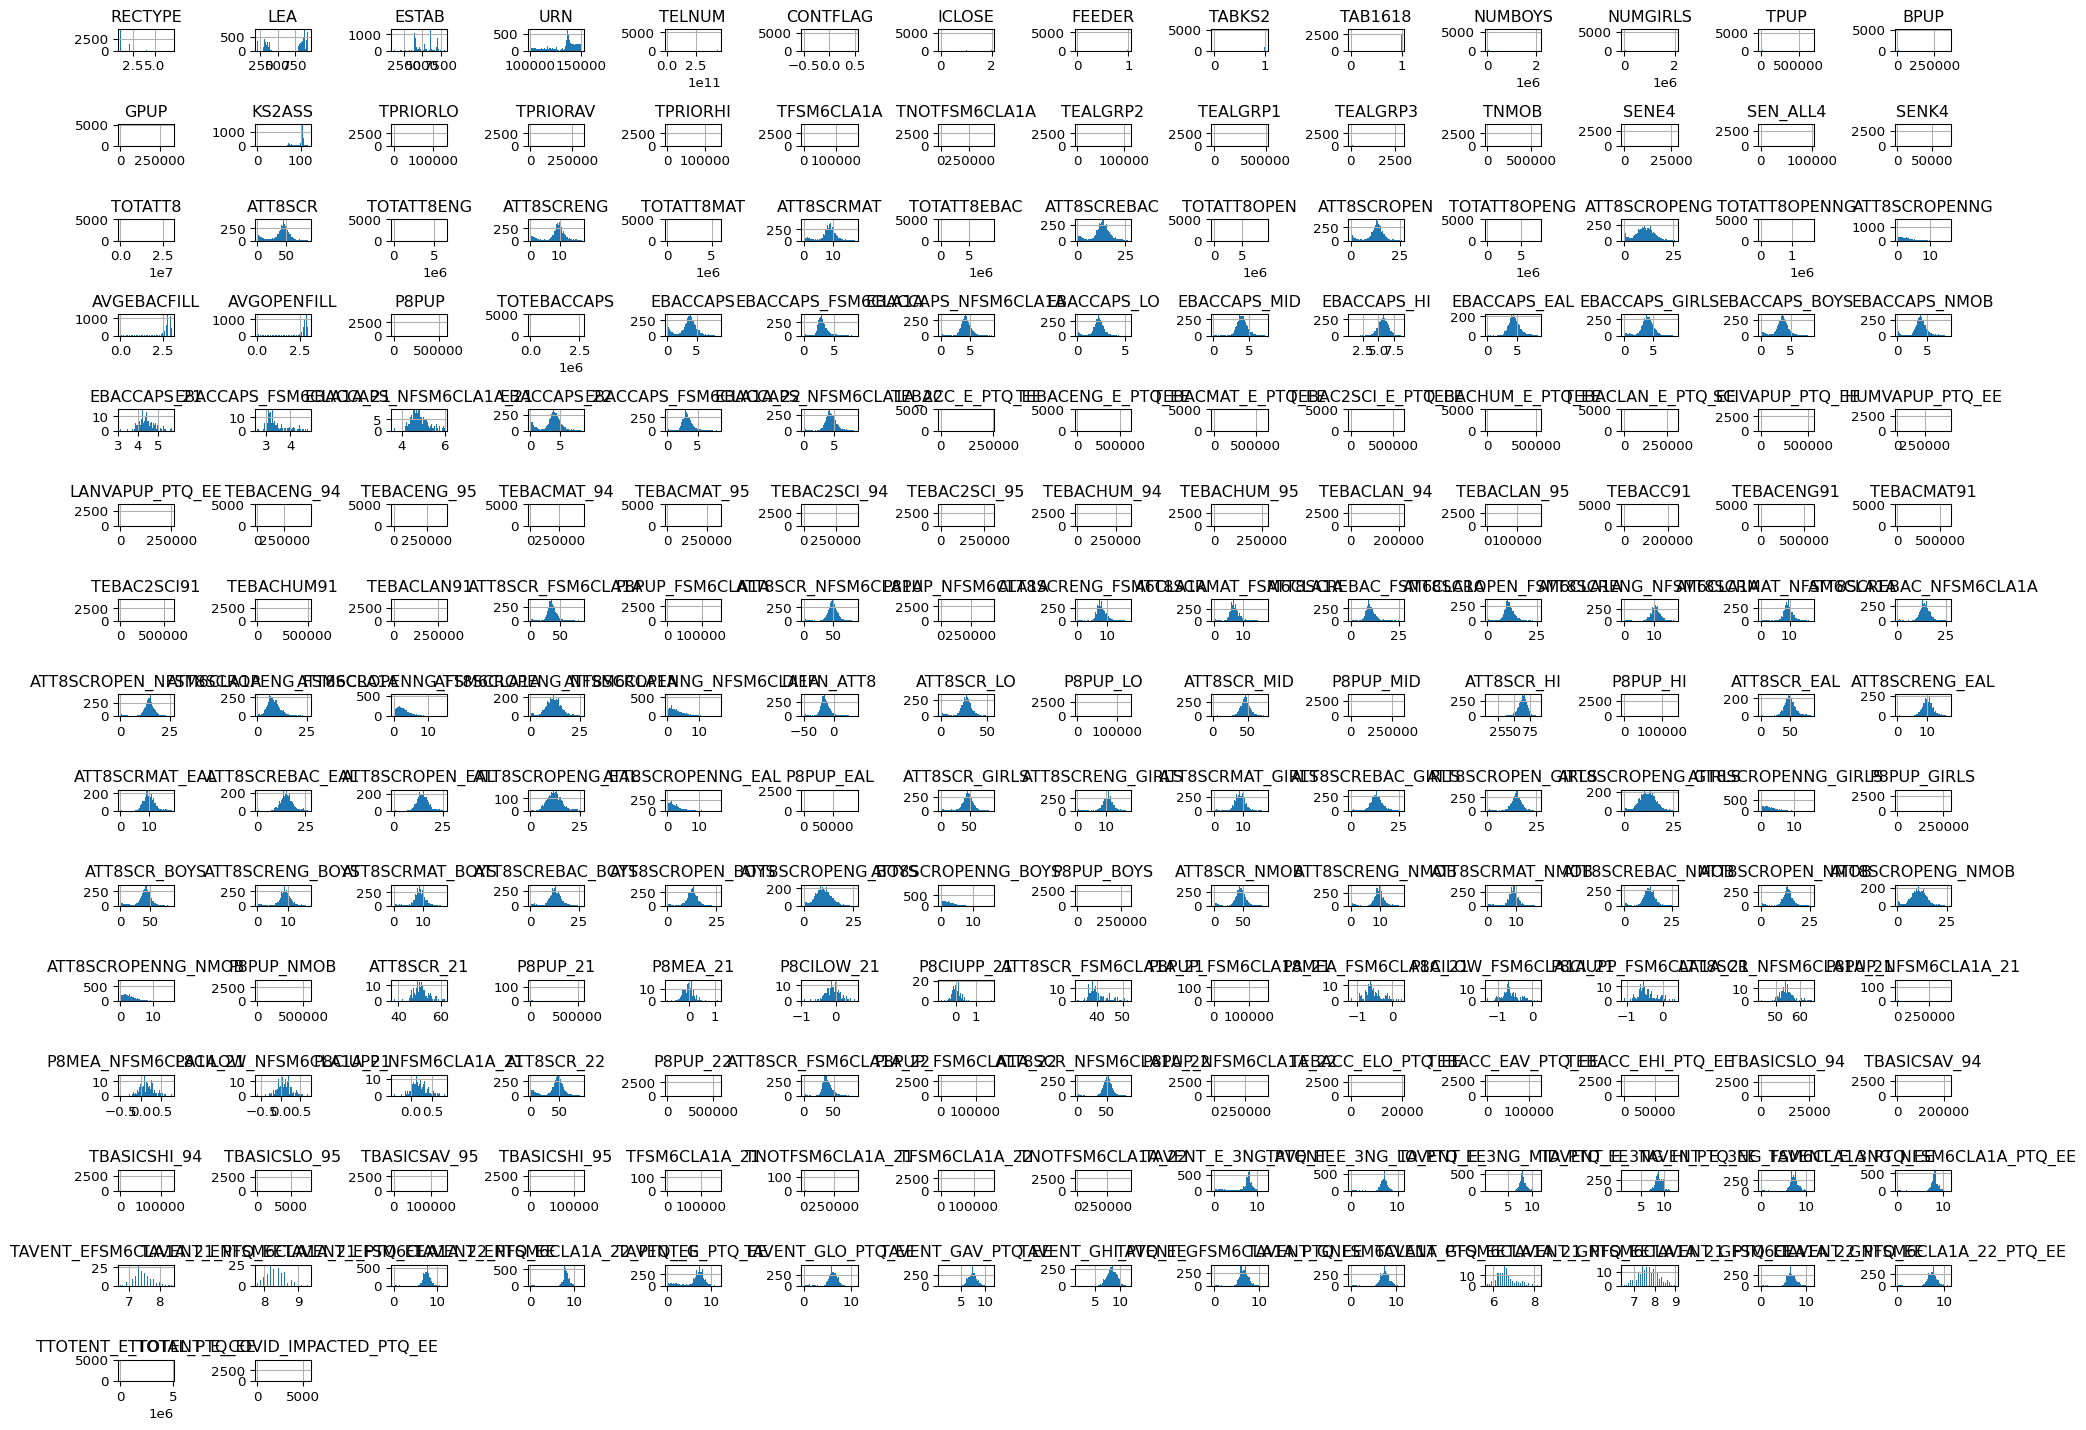

In [17]:
df_ks4.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

## You’re Done!

Well done you’ve completed this weeks practical on establishing and
evaluating hypothesis questions. If you are still working on it, take
your time. If you have any questions just ask!